In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import torch
import os
import models

In [2]:
# ckpt_dir = "checkpoint/wage/lr8lr2_210_testrun-seed-100"
ckpt_dir = "checkpoint/wage/lr8lr2_210_rerun-seed-100"
epoch = 201
data = torch.load(os.path.join(ckpt_dir, "checkpoint-%d.pt"%epoch))
data.keys()

dict_keys(['epoch', 'acc_dict', 'swa_n', 'full_tern', 'low_tern', 'low_acc'])

features.1.weight


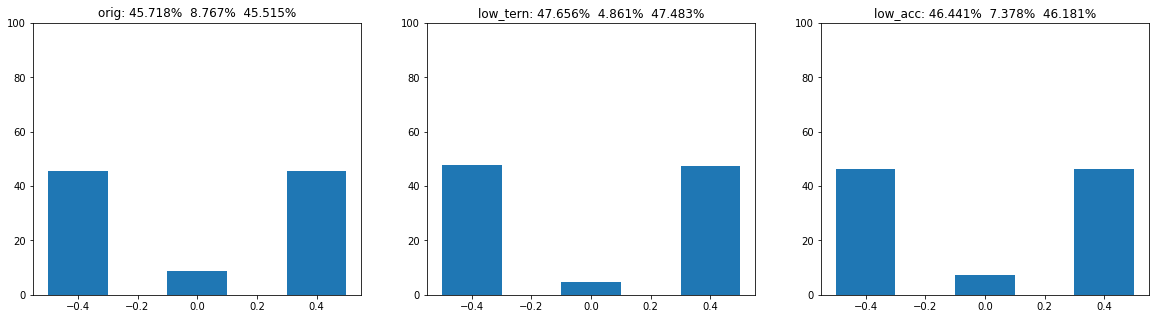

features.4.weight


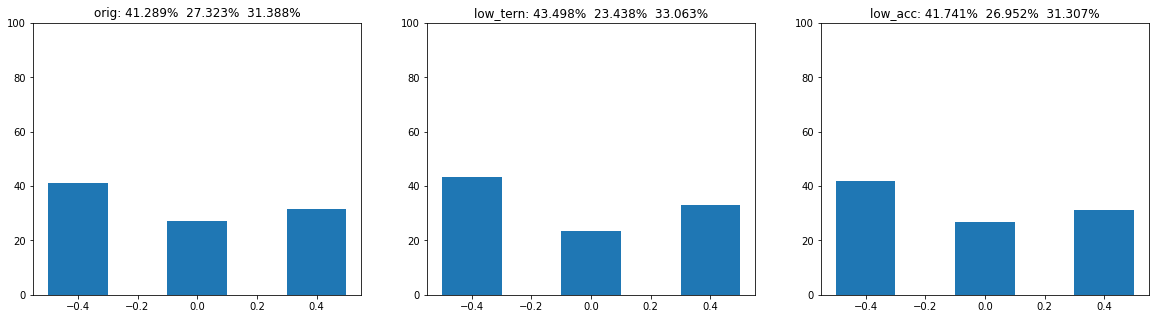

features.8.weight


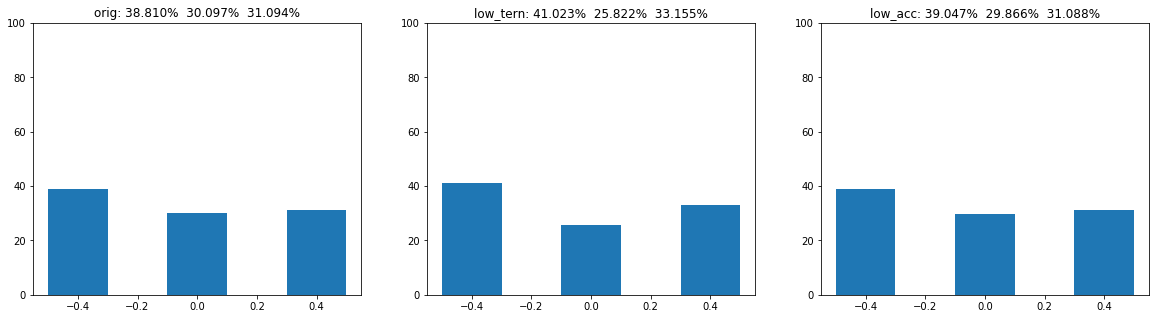

features.11.weight


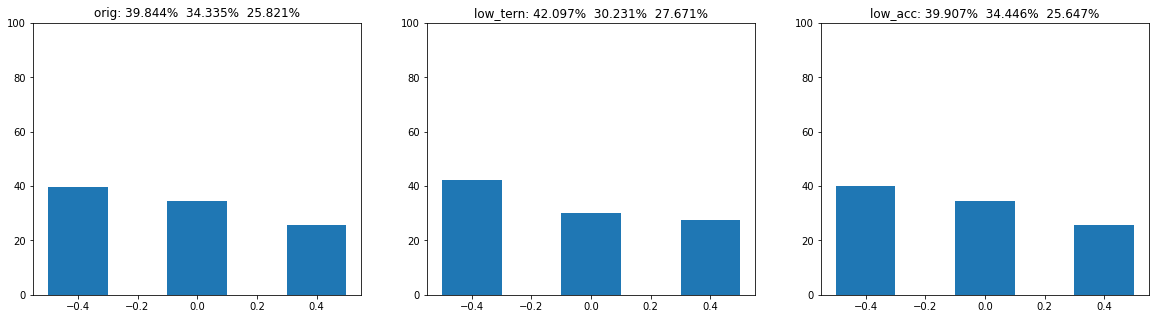

features.15.weight


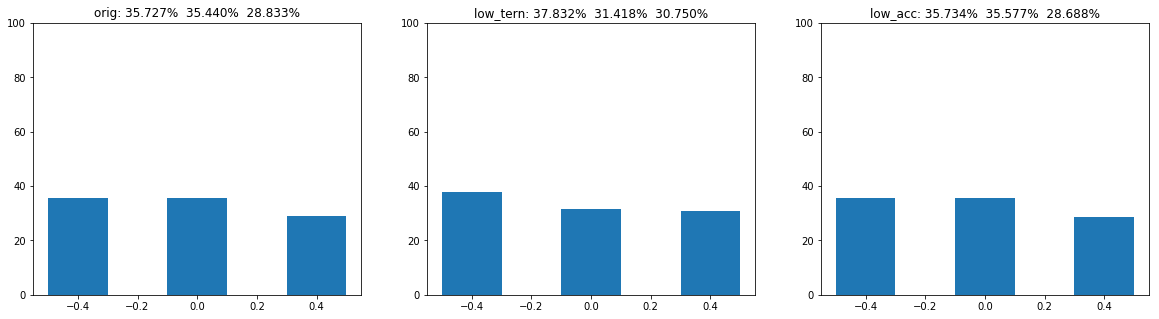

features.18.weight


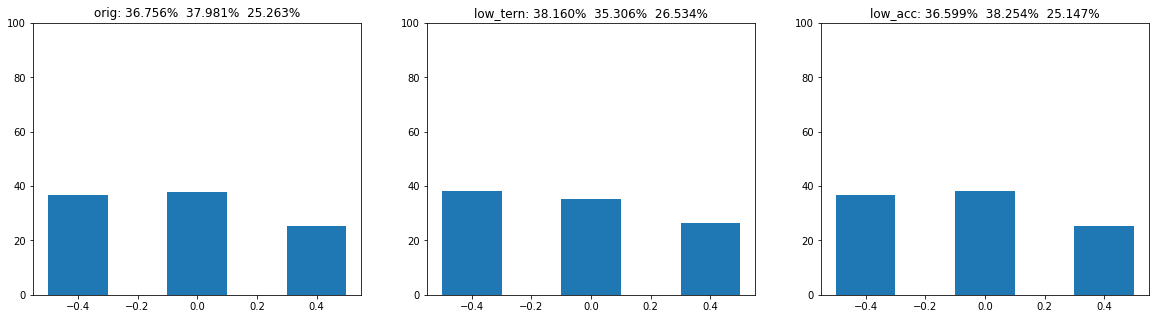

classifier.0.weight


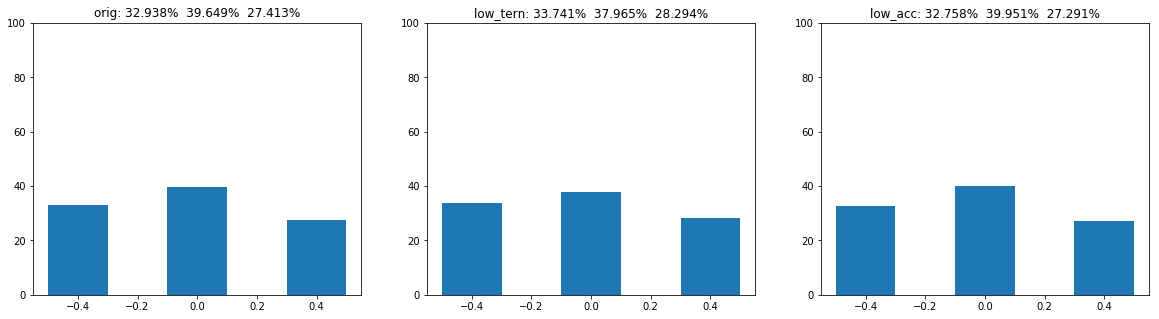

classifier.3.weight


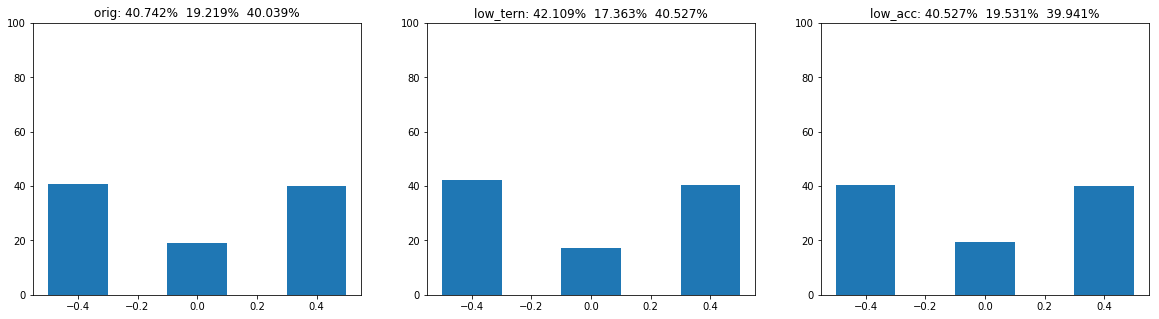

In [3]:
wl = 2
full_tern = {k:models.QW(v, wl).cpu().numpy() for k,v in data['full_tern'].items()}
low_tern = {k:models.QW(v, wl).cpu().numpy() for k,v in data['low_tern'].items()}
low_acc = {k:models.QW(v, wl).cpu().numpy() for k,v in data['low_acc'].items()}
orig = {k:models.QW(v, wl).cpu().numpy() for k,v in data['acc_dict'].items()}
layer_keys = orig.keys()
layer_keys, orig['features.1.weight'].shape

def plot_hist(k, thrs=[0., 0., 0.]):
    plt.figure(figsize=(20,5))
    for i, ((title, wdict), t) in enumerate(zip(
        [("orig",orig), ("low_tern",low_tern), ("low_acc",low_acc)],
        thrs
    )):
        plt.subplot(1,3,i+1)
        flat = wdict[k].flatten()
        plt.hist(flat, bins=5, weights=np.ones_like(flat)/float(len(flat))*100.)
        neg_cnt = (flat < -t).astype(np.int).sum() / float(len(flat)) * 100
        pos_cnt = (flat > t).astype(np.int).sum() / float(len(flat)) * 100
        zeros_cnt = np.logical_and((flat >= -t), (flat <= t)).astype(np.int).sum() / float(len(flat)) * 100
#         plt.bar(np.arange(3), [neg_cnt, zeros_cnt, pos_cnt])
        plt.title("%s: %2.3f%%  %2.3f%%  %2.3f%%"%(title, neg_cnt, zeros_cnt, pos_cnt))
        plt.ylim(0, 100)
#         plt.xticks(np.arange(3), ["-0.5", "0", "0.5"])
#         plt.hist(wdict[k].flatten(), bins=3, range=(-0.5, 0.5), density=True)
    
    plt.show()

for k in layer_keys:
    print(k)
    plot_hist(k, thrs=[0.25, 0.25, 0.25])

features.1.weight


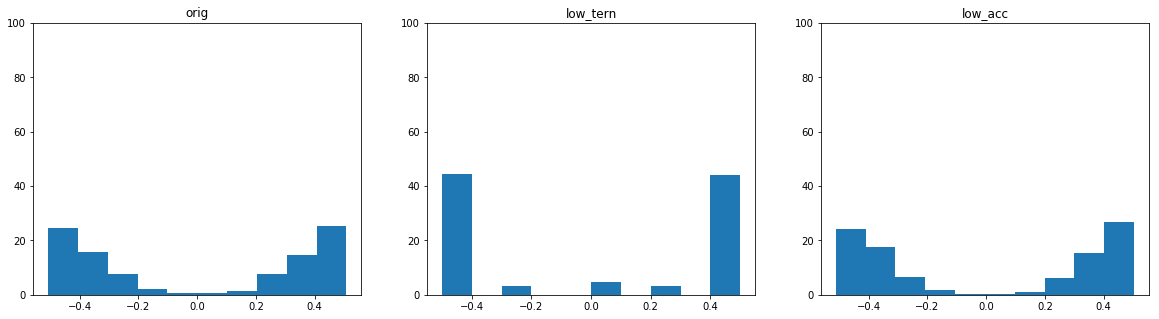

features.4.weight


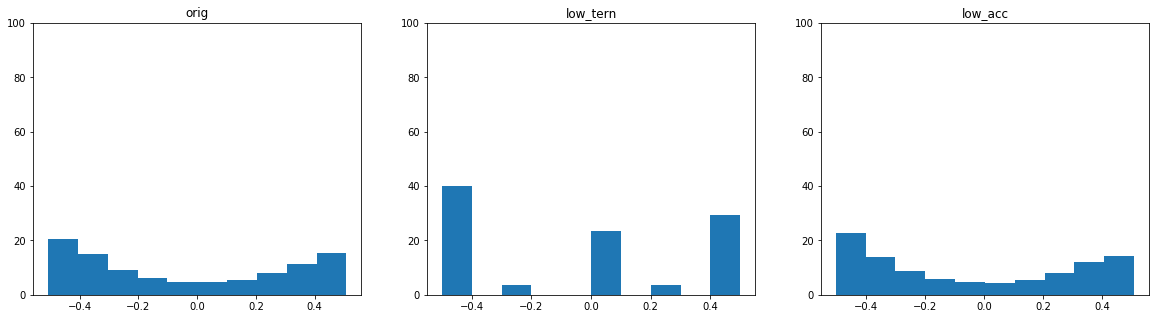

features.8.weight


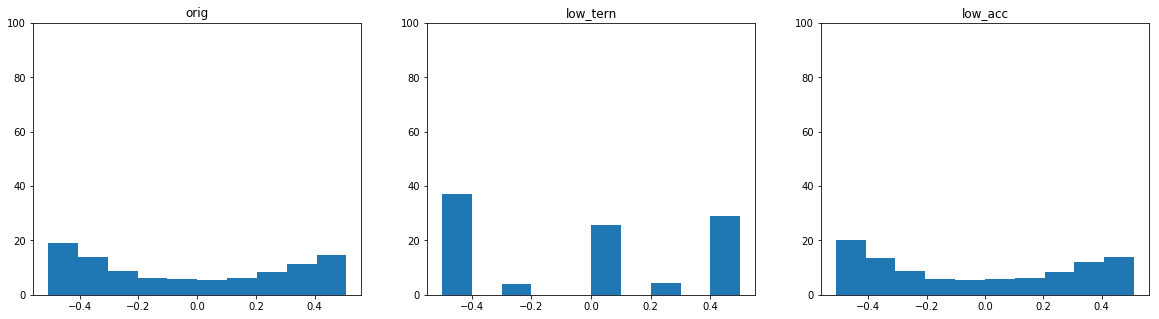

features.11.weight


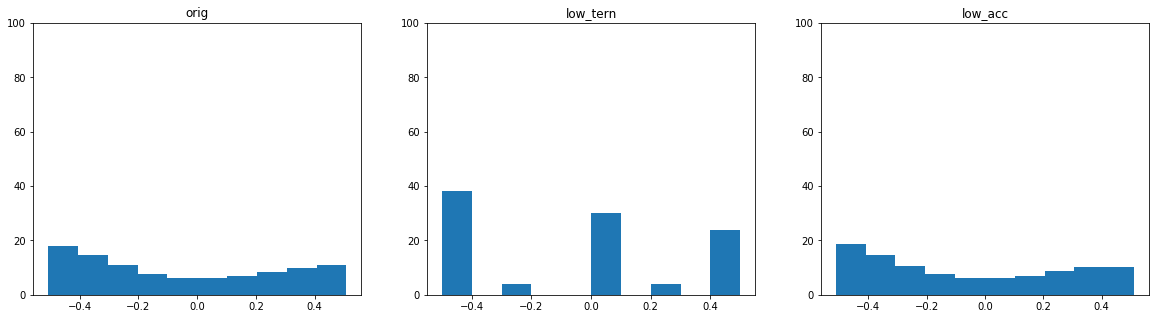

features.15.weight


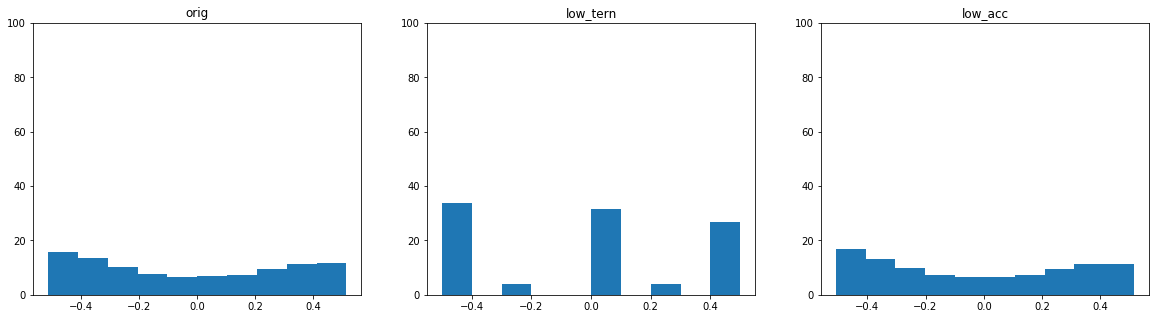

features.18.weight


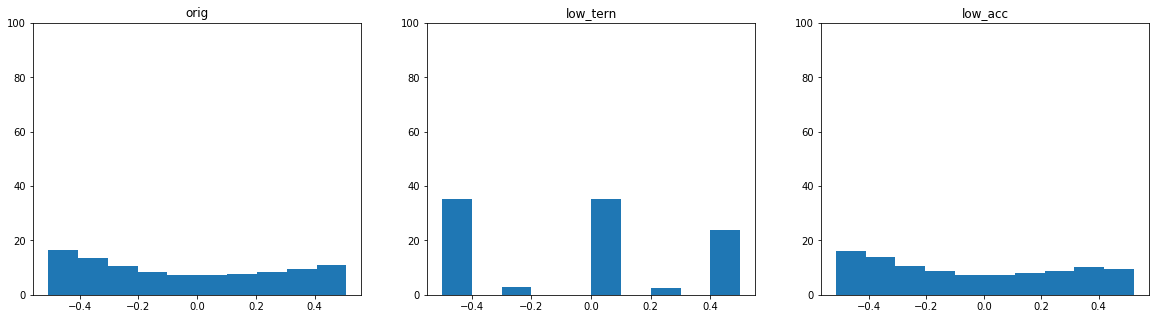

classifier.0.weight


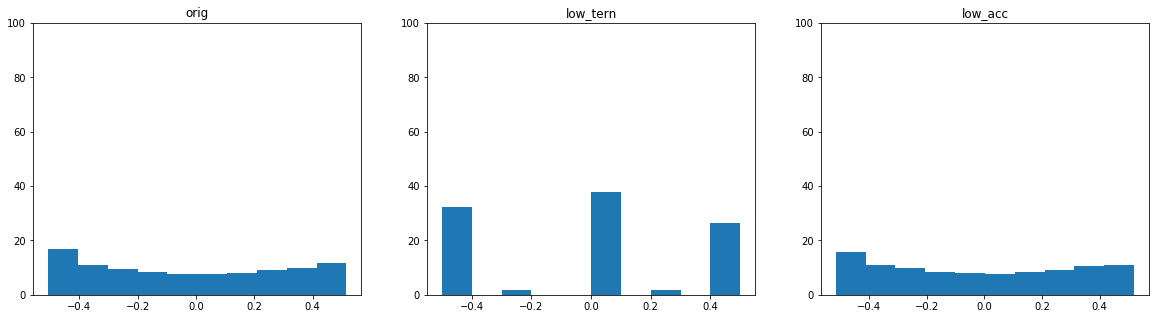

classifier.3.weight


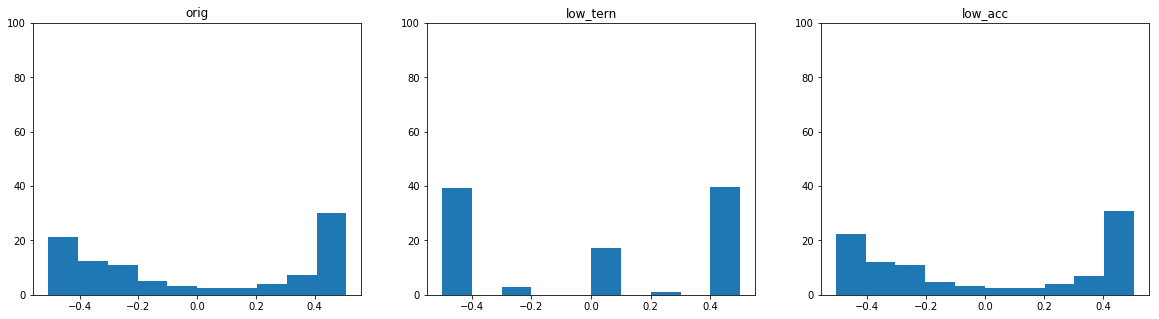

In [4]:
wl = 2
full_tern_bfq = {k:v.cpu().numpy() for k,v in data['full_tern'].items()}
low_tern_bfq = {k:v.cpu().numpy() for k,v in data['low_tern'].items()}
low_acc_bfq = {k:v.cpu().numpy() for k,v in data['low_acc'].items()}
orig_bfq = {k:v.cpu().numpy() for k,v in data['acc_dict'].items()}
layer_keys = orig.keys()
layer_keys, orig['features.1.weight'].shape

def plot_full_hist(k):
    plt.figure(figsize=(20,5))
    for i, (title, wdict) in enumerate([("orig",orig_bfq), ("low_tern",low_tern_bfq), ("low_acc",low_acc_bfq)]):
        plt.subplot(1,3,i+1)
        flat = wdict[k].flatten()
#         plt.hist(flat, density=True, range=(-0.6,0.6))
        plt.hist(flat, density=False, weights=np.ones_like(flat)/float(len(flat))*100.)
        plt.title("%s"%(title))
        plt.ylim(0, 100)
    plt.show()

for k in layer_keys:
    print(k)
    plot_full_hist(k)


In [5]:
import tqdm
orig_weights = {}
for epoch in tqdm.trange(200, 300):
    data = torch.load(os.path.join(ckpt_dir, "checkpoint-%d.pt"%epoch))
    orig = {k:v.cpu().numpy() for k,v in data['acc_dict'].items()}
    orig_weights[epoch] = orig
orig_weights.keys()

100%|██████████| 100/100 [00:13<00:00,  7.32it/s]


dict_keys([200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299])

In [10]:
from tensorboardX import SummaryWriter
from data_loaders import get_data_loaders
loaders = get_data_loaders('CIFAR10', '.', 0., 128, 0)
writer = SummaryWriter(log_dir="test_run")
model_cfg = models.WAGEVGG7
model_cfg.kwargs.update({
    "wl_activate":8, "fl_activate":-1,
    "wl_error": 8, "fl_error":-1,
    "wl_weight":2,
    "layer_type":'wage'
})
model = model_cfg.base(
    *model_cfg.args,
    num_classes=10, writer=writer,
    **model_cfg.kwargs) 
model.cuda()

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


VGG(
  (features): Sequential(
    (0): WAGEQuantizer()
    (1): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (2): ReLU(inplace)
    (3): WAGEQuantizer()
    (4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): ReLU(inplace)
    (7): WAGEQuantizer()
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (9): ReLU(inplace)
    (10): WAGEQuantizer()
    (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (12): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (13): ReLU(inplace)
    (14): WAGEQuantizer()
    (15): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (16): ReLU(inplace)
    (17): WAGEQuantizer()
    (18): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=Fa

In [11]:
import utils
criterion = utils.SSE

wl_weights = 2
def evalweights(weights):
    weights = {k:torch.from_numpy(v).cuda() for k,v in weights.items()}
    for n in weights.keys():
        model.weight_acc[n] = weights[n]
    return utils.eval(loaders['test'], model, utils.SSE, 
                      wage_quantizer=(lambda x,s : models.QW(x,2,s)))
    
evalweights(full_tern_bfq)

{'loss': 11.43452439994812,
 'accuracy': 92.36999999999999,
 'semi_accuracy': 92.36999999999999}